# TEAM 6 - Pima Indians Diabetes - EDA
[Link to dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

# Tables of Contents

1. Load library
2. Dataset overview
3. What is diabetes?
4. Cleaning data
5. EDA

## 1. Load library

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2. Dataset overview

In [0]:
data = pd.read_csv('diabetes.csv')

In [341]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [343]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


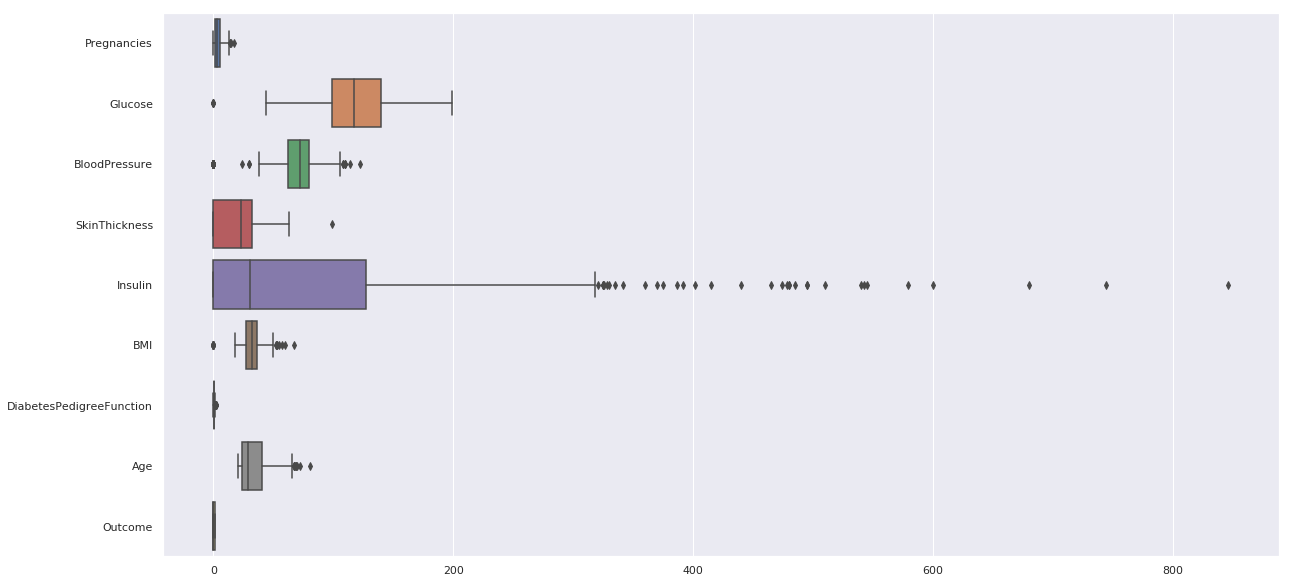

In [344]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=data, orient="h")

## 3. What is diabetes ?
Acccording to NIH, "**Diabetes** is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

**What are the different types of diabetes?** The most common types of diabetes are type 1, type 2, and gestational diabetes.

**Type 1 diabetes** If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

**Type 2 diabetes** If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

**Gestational diabetes** Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

Other types of diabetes Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

## 4. Cleaning data

### a. Remove missing data

In [345]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [346]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [347]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
# data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [0]:
isnan_data = data

isnan_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [350]:
isna_cnt = isnan_data.isna().sum()
isna_calc = {'sum': [], 'percent': []}
for c in isnan_data.columns:
  isna_calc['sum'].append(isna_cnt[c])
  isna_calc['percent'].append(round(isna_cnt[c] / data.shape[0] * 10000) / 100)
missing_value = pd.DataFrame(isna_calc)
missing_value.index = data.columns
missing_value.sort_values(by=['sum', 'percent'], ascending=False)

,sum,percent
Insulin,374,48.70
SkinThickness,227,29.56
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65
Pregnancies,0,0.00
DiabetesPedigreeFunction,0,0.00
Age,0,0.00
Outcome,0,0.00


In [0]:
isnan_data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)
isnan_data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace=True)
isnan_data = isnan_data[isnan_data['BloodPressure'].isna() == False]
isnan_data = isnan_data[isnan_data['BMI'].isna() == False]
isnan_data = isnan_data[isnan_data['Glucose'].isna() == False]
data = isnan_data

In [352]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.174664,155.823218,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.018916,87.395661,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,155.548223,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### b. Remove outlier

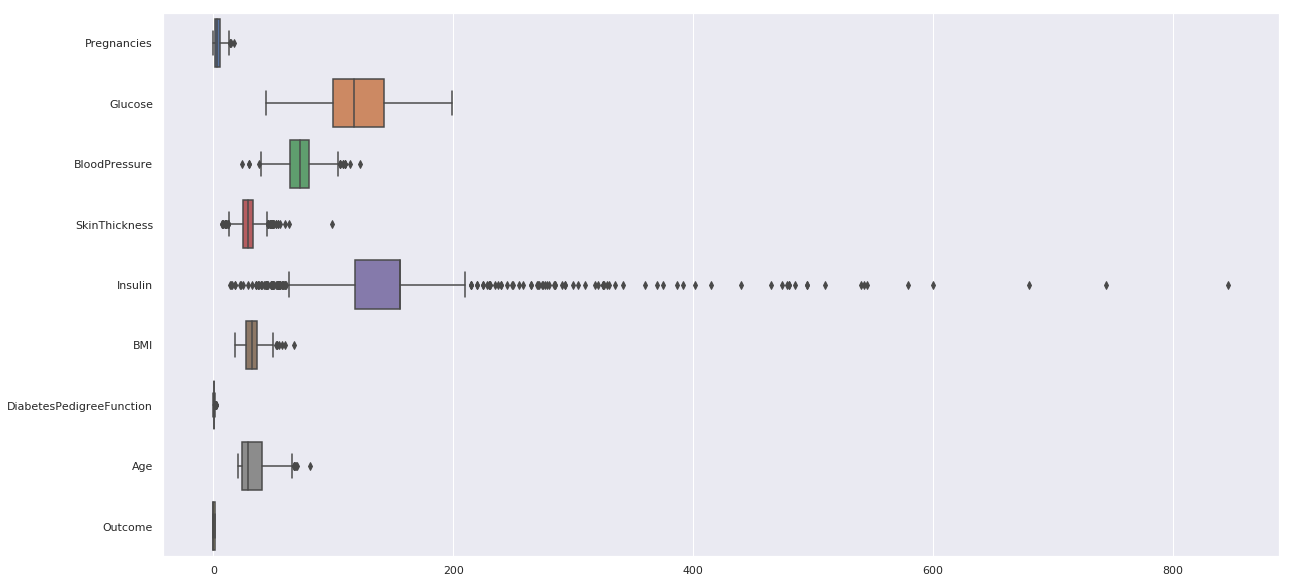

In [353]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=data, orient="h")

In [0]:
def removeOutlier(data, column):
  values = data[column].values
  q1 = np.quantile(values, 0.25)
  q3 = np.quantile(values, 0.75)
  iqr = q3 - q1
  minn = q1 - 1.5 * iqr
  maxx = q1 + 1.5 * iqr
  
  return data[(data[column] >= minn) & (data[column] <= maxx)]

In [0]:
for c in data.columns:
  if c != 'Outcome':
    data = removeOutlier(data, c)

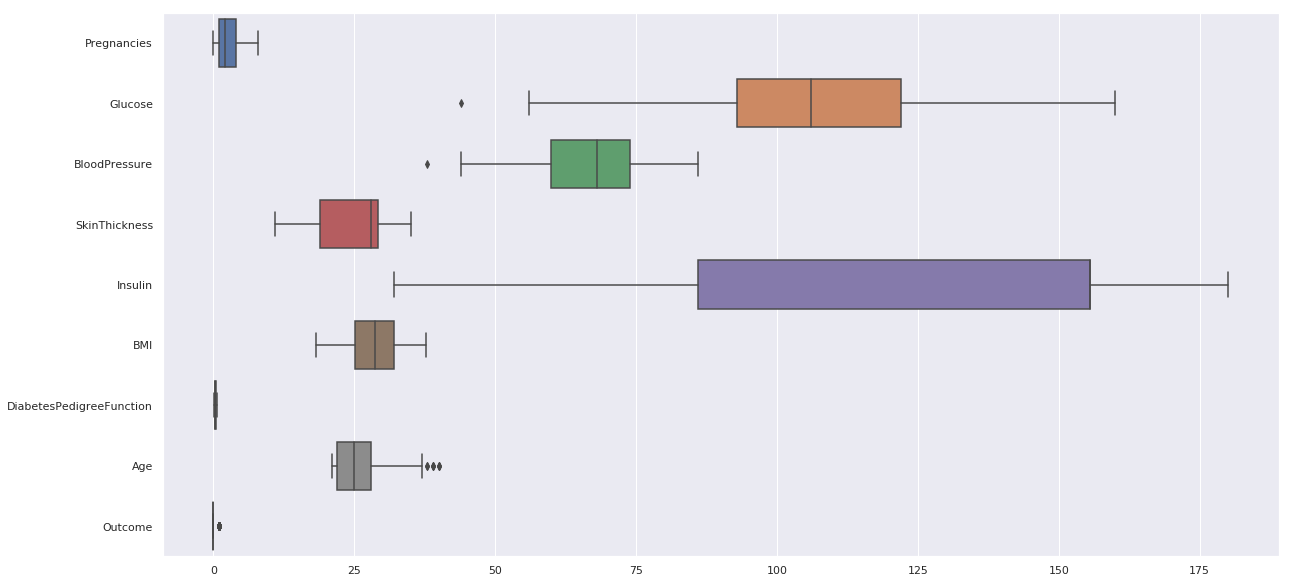

In [356]:
sns.boxplot(data=data, orient="h")

In [357]:
data.shape

(241, 9)

## 5. EDA

In [0]:
sns.set(rc={'figure.figsize':(10,5)})

In [0]:
def plotCountAndDistribution(data):
  f, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.countplot(data, ax=axes[0])
  sns.distplot(data, ax=axes[1])

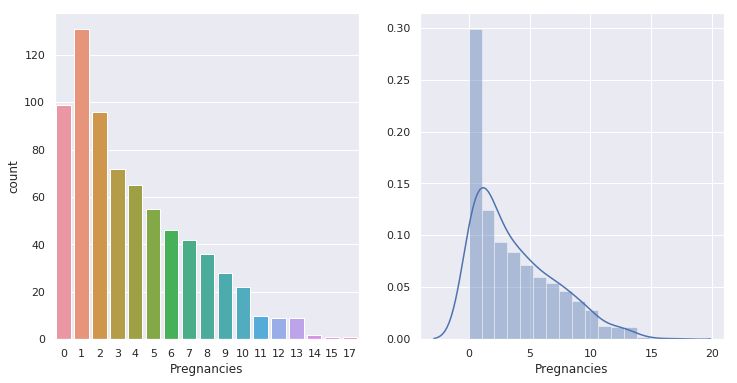

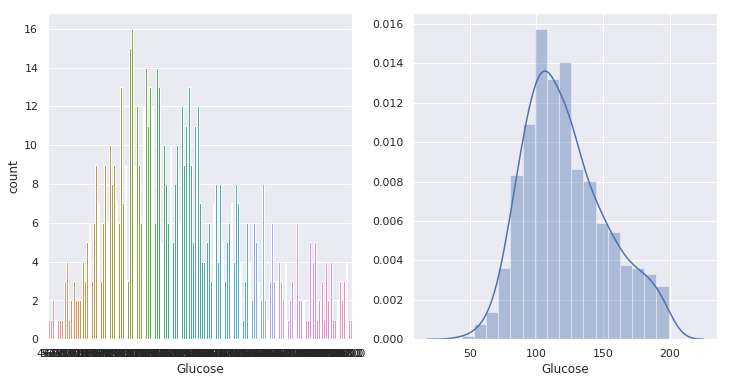

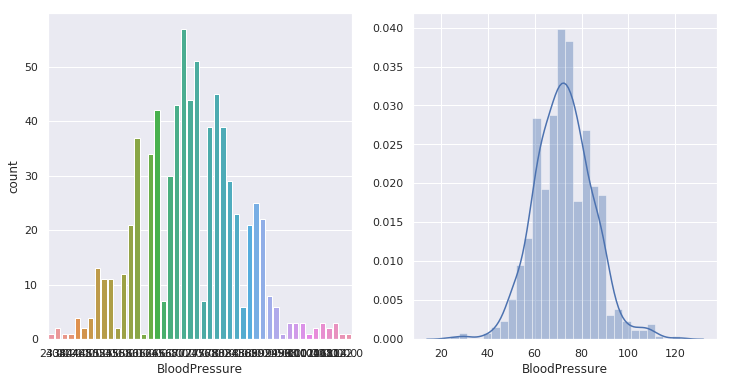

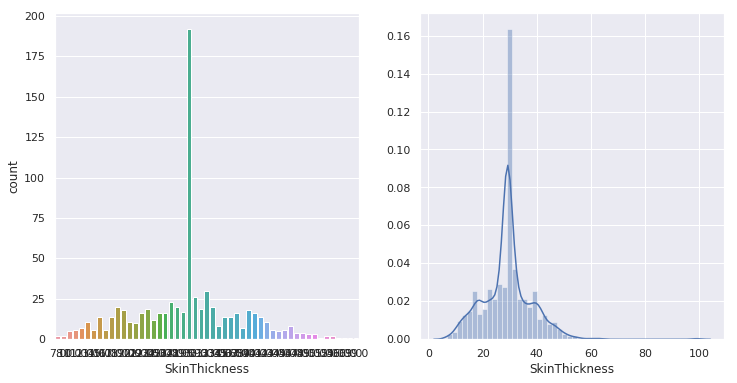

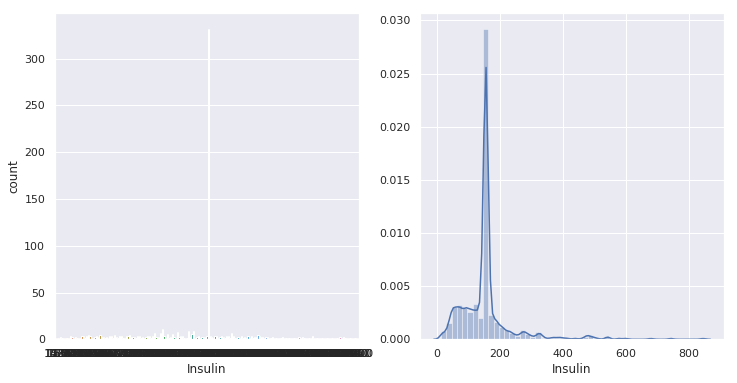

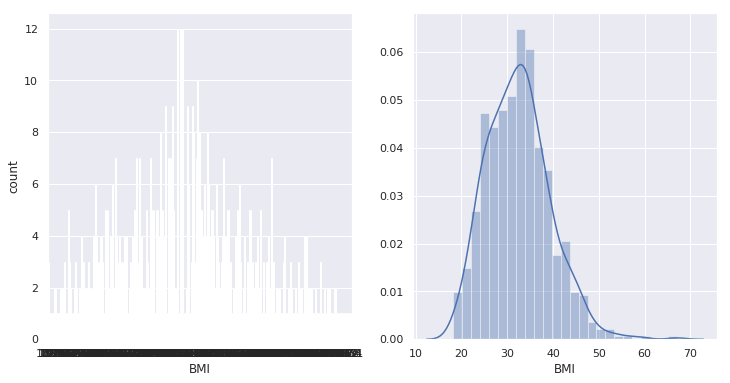

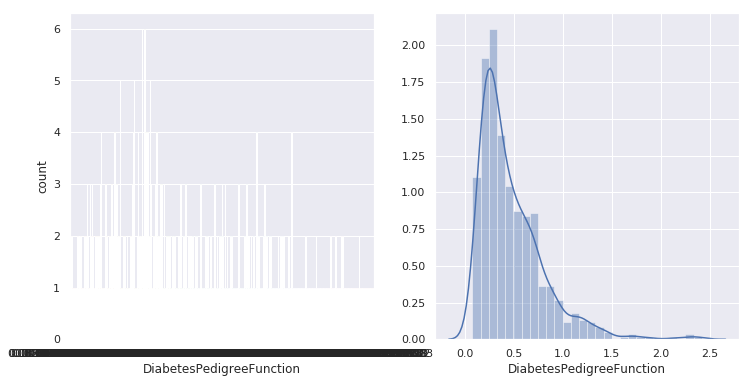

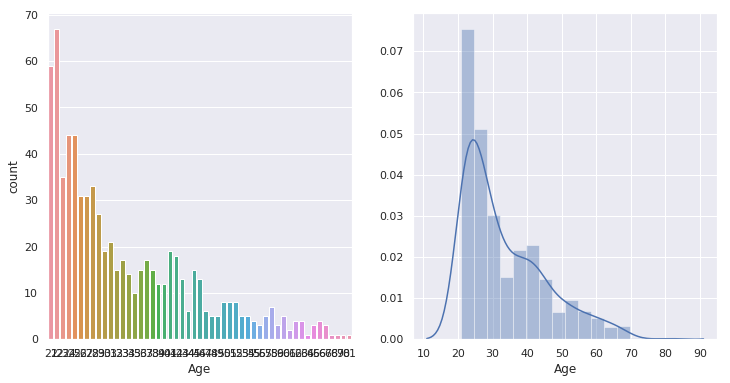

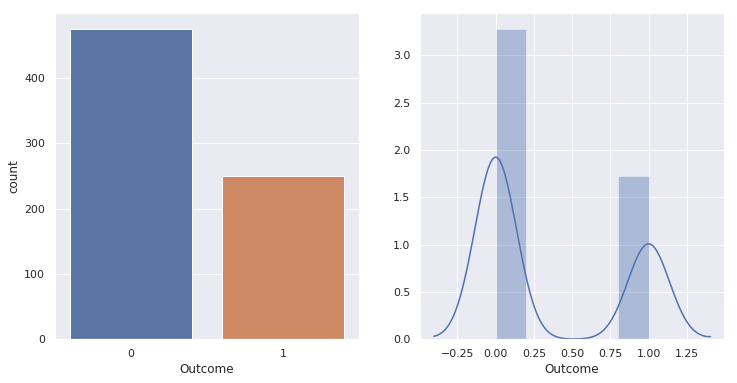

In [332]:
for c in data.columns:
  plotCountAndDistribution(data[c])

In [317]:
data.shape

(241, 9)

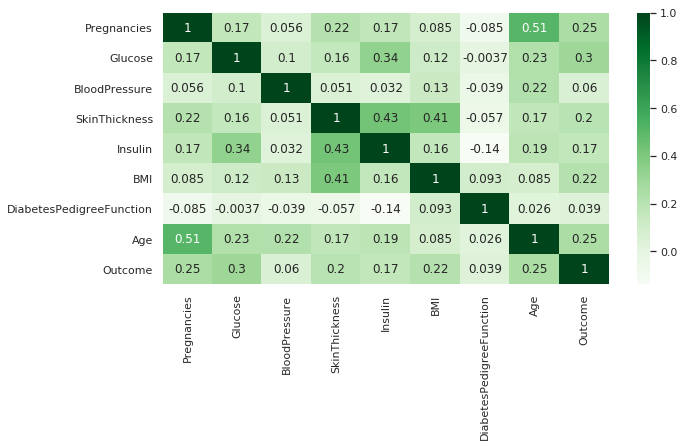

In [361]:
sns.heatmap(data=data.corr(), annot=True, cmap='Greens')